Import Libraries

Load Libraries

In [14]:
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.style.use('ggplot')
%matplotlib inline
import warnings
# Ignore all warnings 
warnings.filterwarnings("ignore")

Load Data

In [15]:
df = pd.read_csv('../Data/cleaned_data.csv')

Visualize price to analize

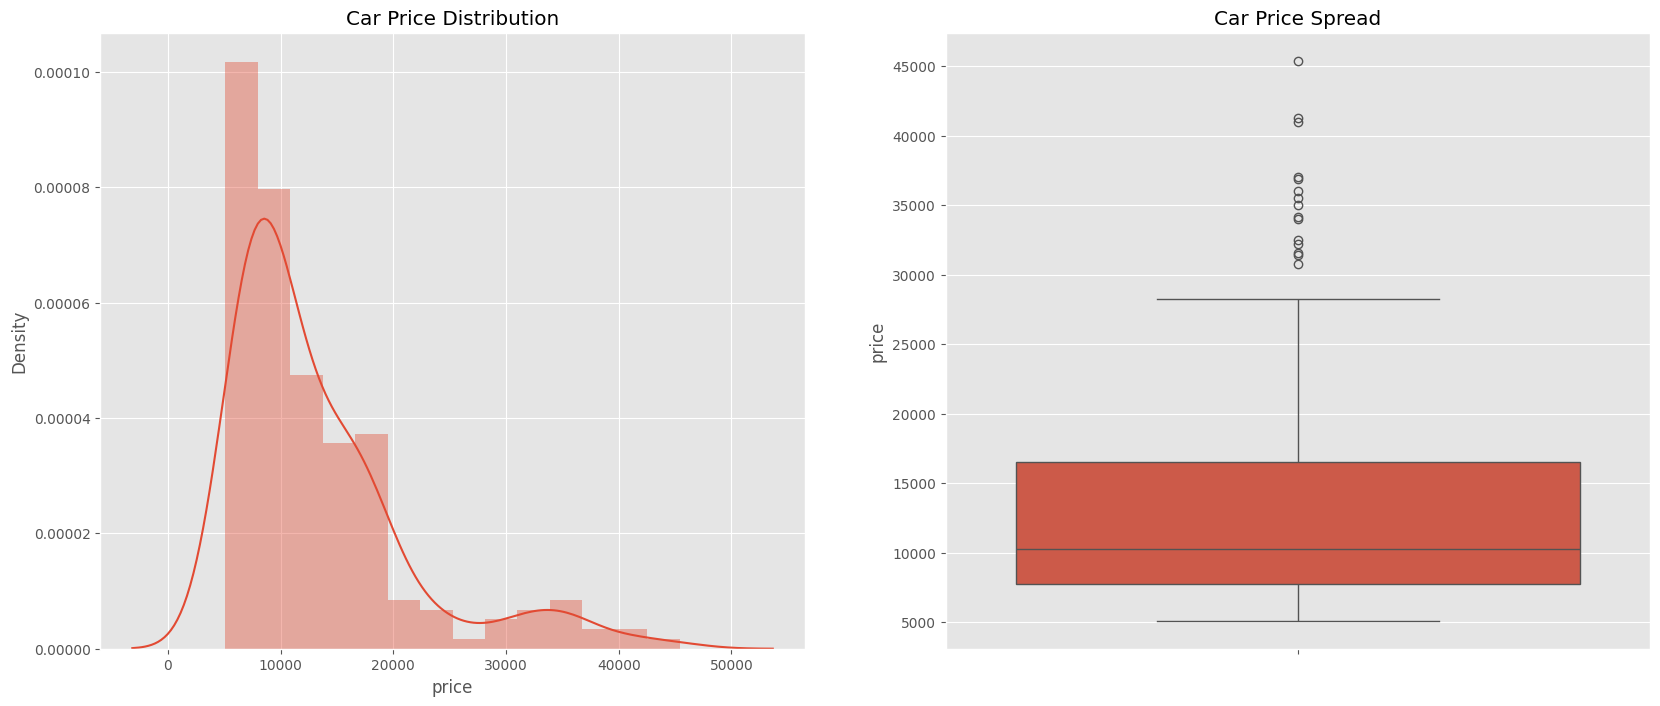

In [16]:
def plot_car_price_distribution():
    fig, ax = plt.subplots(1, 2, figsize=(20, 8))

    ax[0].set_title('Car Price Distribution')
    sns.distplot(df.price, ax=ax[0])

    ax[1].set_title('Car Price Spread')
    sns.boxplot(y=df.price, ax=ax[1])

    plt.show()

plot_car_price_distribution()

In [17]:
# Count the number of times each value is repeated in the 'Brand' column
brand_counts = df['Brand'].value_counts()

# Print
print("Number of cars by brands:")
print(brand_counts)

Number of cars by brands:
Brand
Toyota        32
Nissan        18
Mazda         17
Mitsubishi    13
Honda         13
Volkswagen    12
Subaru        12
Peugeot       11
Volvo         11
Dodge          9
Buick          8
BMW            8
Audi           7
Plymouth       7
Saab           6
Porsche        5
Isuzu          4
Jaguar         3
Chevrolet      3
Alfa Romeo     3
Renault        2
Mercury        1
Name: count, dtype: int64


In [18]:
# Count the number of cars that use gas and diesel
fuel_counts = df['fueltype'].value_counts()

# Print 
print("List of number of cars by type of fuel:")
print(fuel_counts)

List of number of cars by type of fuel:
fueltype
gas       185
diesel     20
Name: count, dtype: int64


In [19]:
# Get the relationship between the car brand and the type of fuel
brand_fuel_relation = df.groupby(['Brand', 'fueltype']).size().reset_index(name='Count')

# Print
print(brand_fuel_relation)

         Brand fueltype  Count
0   Alfa Romeo      gas      3
1         Audi      gas      7
2          BMW      gas      8
3        Buick   diesel      4
4        Buick      gas      4
5    Chevrolet      gas      3
6        Dodge      gas      9
7        Honda      gas     13
8        Isuzu      gas      4
9       Jaguar      gas      3
10       Mazda   diesel      2
11       Mazda      gas     15
12     Mercury      gas      1
13  Mitsubishi      gas     13
14      Nissan   diesel      1
15      Nissan      gas     17
16     Peugeot   diesel      5
17     Peugeot      gas      6
18    Plymouth      gas      7
19     Porsche      gas      5
20     Renault      gas      2
21        Saab      gas      6
22      Subaru      gas     12
23      Toyota   diesel      3
24      Toyota      gas     29
25  Volkswagen   diesel      4
26  Volkswagen      gas      8
27       Volvo   diesel      1
28       Volvo      gas     10


In [20]:
# Select cars with fueltype diesel
diesel_cars = df[df['fueltype'] == 'diesel']

print(diesel_cars[['Brand', 'Model', 'price']])

          Brand               Model    price
63        Mazda          Glc Deluxe  10795.0
66        Mazda             Rx-7 Gs  18344.0
67        Buick  Electra 225 Custom  25552.0
68        Buick  Century Luxus (Sw)  28248.0
69        Buick             Century  28176.0
70        Buick             Skyhawk  31600.0
90       Nissan                Gt-R   7099.0
108     Peugeot                 304  13200.0
110     Peugeot                 504  13860.0
112     Peugeot               604Sl  16900.0
114     Peugeot   505S Turbo Diesel  17075.0
116     Peugeot                 504  17950.0
158      Toyota              Corona   7898.0
159      Toyota             Corolla   7788.0
174      Toyota           Celica Gt  10698.0
182  Volkswagen              Rabbit   7775.0
184  Volkswagen           Model 111   7995.0
187  Volkswagen        Super Beetle   9495.0
192  Volkswagen       Rabbit Custom  13845.0
203       Volvo                 246  22470.0


In [21]:
# Count the number of cars that use gas and diesel
body_counts = df['carbody'].value_counts()

# Print 
print("List of number of cars by body:")
print(body_counts)

List of number of cars by body:
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64


In [22]:
# Get  the relationship between the car brand and the type of fuel
brand_body_relation = df.groupby(['Brand', 'carbody']).size().reset_index(name='Count')

# Print 
print("Relationship between brand and body:")
print(brand_body_relation)

Relationship between brand and body:
         Brand      carbody  Count
0   Alfa Romeo  convertible      2
1   Alfa Romeo    hatchback      1
2         Audi    hatchback      1
3         Audi        sedan      5
4         Audi        wagon      1
5          BMW        sedan      8
6        Buick  convertible      1
7        Buick      hardtop      2
8        Buick        sedan      4
9        Buick        wagon      1
10   Chevrolet    hatchback      2
11   Chevrolet        sedan      1
12       Dodge    hatchback      5
13       Dodge        sedan      3
14       Dodge        wagon      1
15       Honda    hatchback      7
16       Honda        sedan      5
17       Honda        wagon      1
18       Isuzu    hatchback      1
19       Isuzu        sedan      3
20      Jaguar        sedan      3
21       Mazda    hatchback     10
22       Mazda        sedan      7
23     Mercury    hatchback      1
24  Mitsubishi    hatchback      9
25  Mitsubishi        sedan      4
26      Nissan    

In [23]:
# Count the number of cars that use gas and diesel
doors = df['doornumber'].value_counts()

# Print 
print("List of number of cars by doors number:")
print(doors)

List of number of cars by doors number:
doornumber
four    115
two      90
Name: count, dtype: int64


In [24]:
# Get Top 10 Most Expensive Cars
top_expensive_cars = get_top_n_cars(df, 10)

# Get Top 10 Cheapest Cars
top_cheap_cars = get_top_n_cars(df, 10, column='price')

# Print the results
print("Top 10 Most Expensive Cars:")
print(top_expensive_cars)

print("\nTop 10 Cheapest Cars:")
print(top_cheap_cars)

Top 10 Most Expensive Cars:
       Brand                      Model    price      carbody fueltype
74     Buick  Regal Sport Coupe (Turbo)  45400.0      hardtop      gas
16       BMW                         X5  41315.0        sedan      gas
73     Buick            Century Special  40960.0        sedan      gas
128  Porsche                     Boxter  37028.0  convertible      gas
17       BMW                         X3  36880.0        sedan      gas
49    Jaguar                         Xk  36000.0        sedan      gas
48    Jaguar                         Xf  35550.0        sedan      gas
72     Buick                    Skylark  35056.0  convertible      gas
71     Buick          Opel Isuzu Deluxe  34184.0        sedan      gas
127  Porsche                    Cayenne  34028.0      hardtop      gas

Top 10 Cheapest Cars:
       Brand                      Model    price      carbody fueltype
74     Buick  Regal Sport Coupe (Turbo)  45400.0      hardtop      gas
16       BMW              

Calculate the median price as selection criteria

In [25]:
# Calculate the median price
median = df["price"].median().astype(int)

# Count how many cars have a price higher than the median
major_to_median = df[df['price'] > median].shape[0]

# Count how many cars have a price less than or equal to the median
less_or_equal_to_median = df[df['price'] <= median].shape[0]

# Print
print ('Median price to get criteria', median)
print("Number of cars with a price higher than the median:", major_to_median)
print("Number of cars with a price less than or equal to the median:", less_or_equal_to_median)

Median price to get criteria 10295
Number of cars with a price higher than the median: 102
Number of cars with a price less than or equal to the median: 103


In [26]:
# Calculate the minimum, maximum and average price per brand
brand_stats = df.groupby('Brand').agg({'price': ['min', 'max', 'mean'], 'Brand': 'count'})

# Round the average price to 2 decimal places
brand_stats['price', 'mean'] = brand_stats['price', 'mean'].round(2)

brand_stats = brand_stats.rename(columns={'Brand': 'CarCount'})
# Sort by average price from high to low
brand_stats = brand_stats.sort_values(by=('price', 'mean'), ascending=False)
# Print
print("Price Statistics by Brand:")
print(brand_stats)


Price Statistics by Brand:
              price                    CarCount
                min      max      mean    count
Brand                                          
Jaguar      32250.0  36000.0  34600.00        3
Buick       25552.0  45400.0  33647.00        8
Porsche     22018.0  37028.0  31400.50        5
BMW         16430.0  41315.0  26118.75        8
Volvo       12940.0  22625.0  18063.18       11
Audi        13950.0  23875.0  17859.17        7
Mercury     16503.0  16503.0  16503.00        1
Alfa Romeo  13495.0  16500.0  15498.33        3
Peugeot     11900.0  18150.0  15489.09       11
Saab        11850.0  18620.0  15223.33        6
Mazda        5195.0  18344.0  10652.88       17
Nissan       5499.0  19699.0  10415.67       18
Volkswagen   7775.0  13845.0  10077.50       12
Toyota       5348.0  17669.0   9885.81       32
Renault      9295.0   9895.0   9595.00        2
Mitsubishi   5389.0  14869.0   9239.77       13
Isuzu        6785.0  11048.0   8916.50        4
Subaru       

It is observed that there are brands whose minimum price is even higher than the median price, which is the classification criterion.
Likewise, there are two brands (Renault and Chevrolet) whose maximum prices do not exceed the median.

Classify cars by price, between those that are higher than the median and those that are lower than the median.

In [27]:
df['price_category'] = 'greater_than_median'
df.loc[df['price'] <= median, 'price_category'] = 'Less or Equal to Median'

Visualization of characteristics that we think are relevant to our study

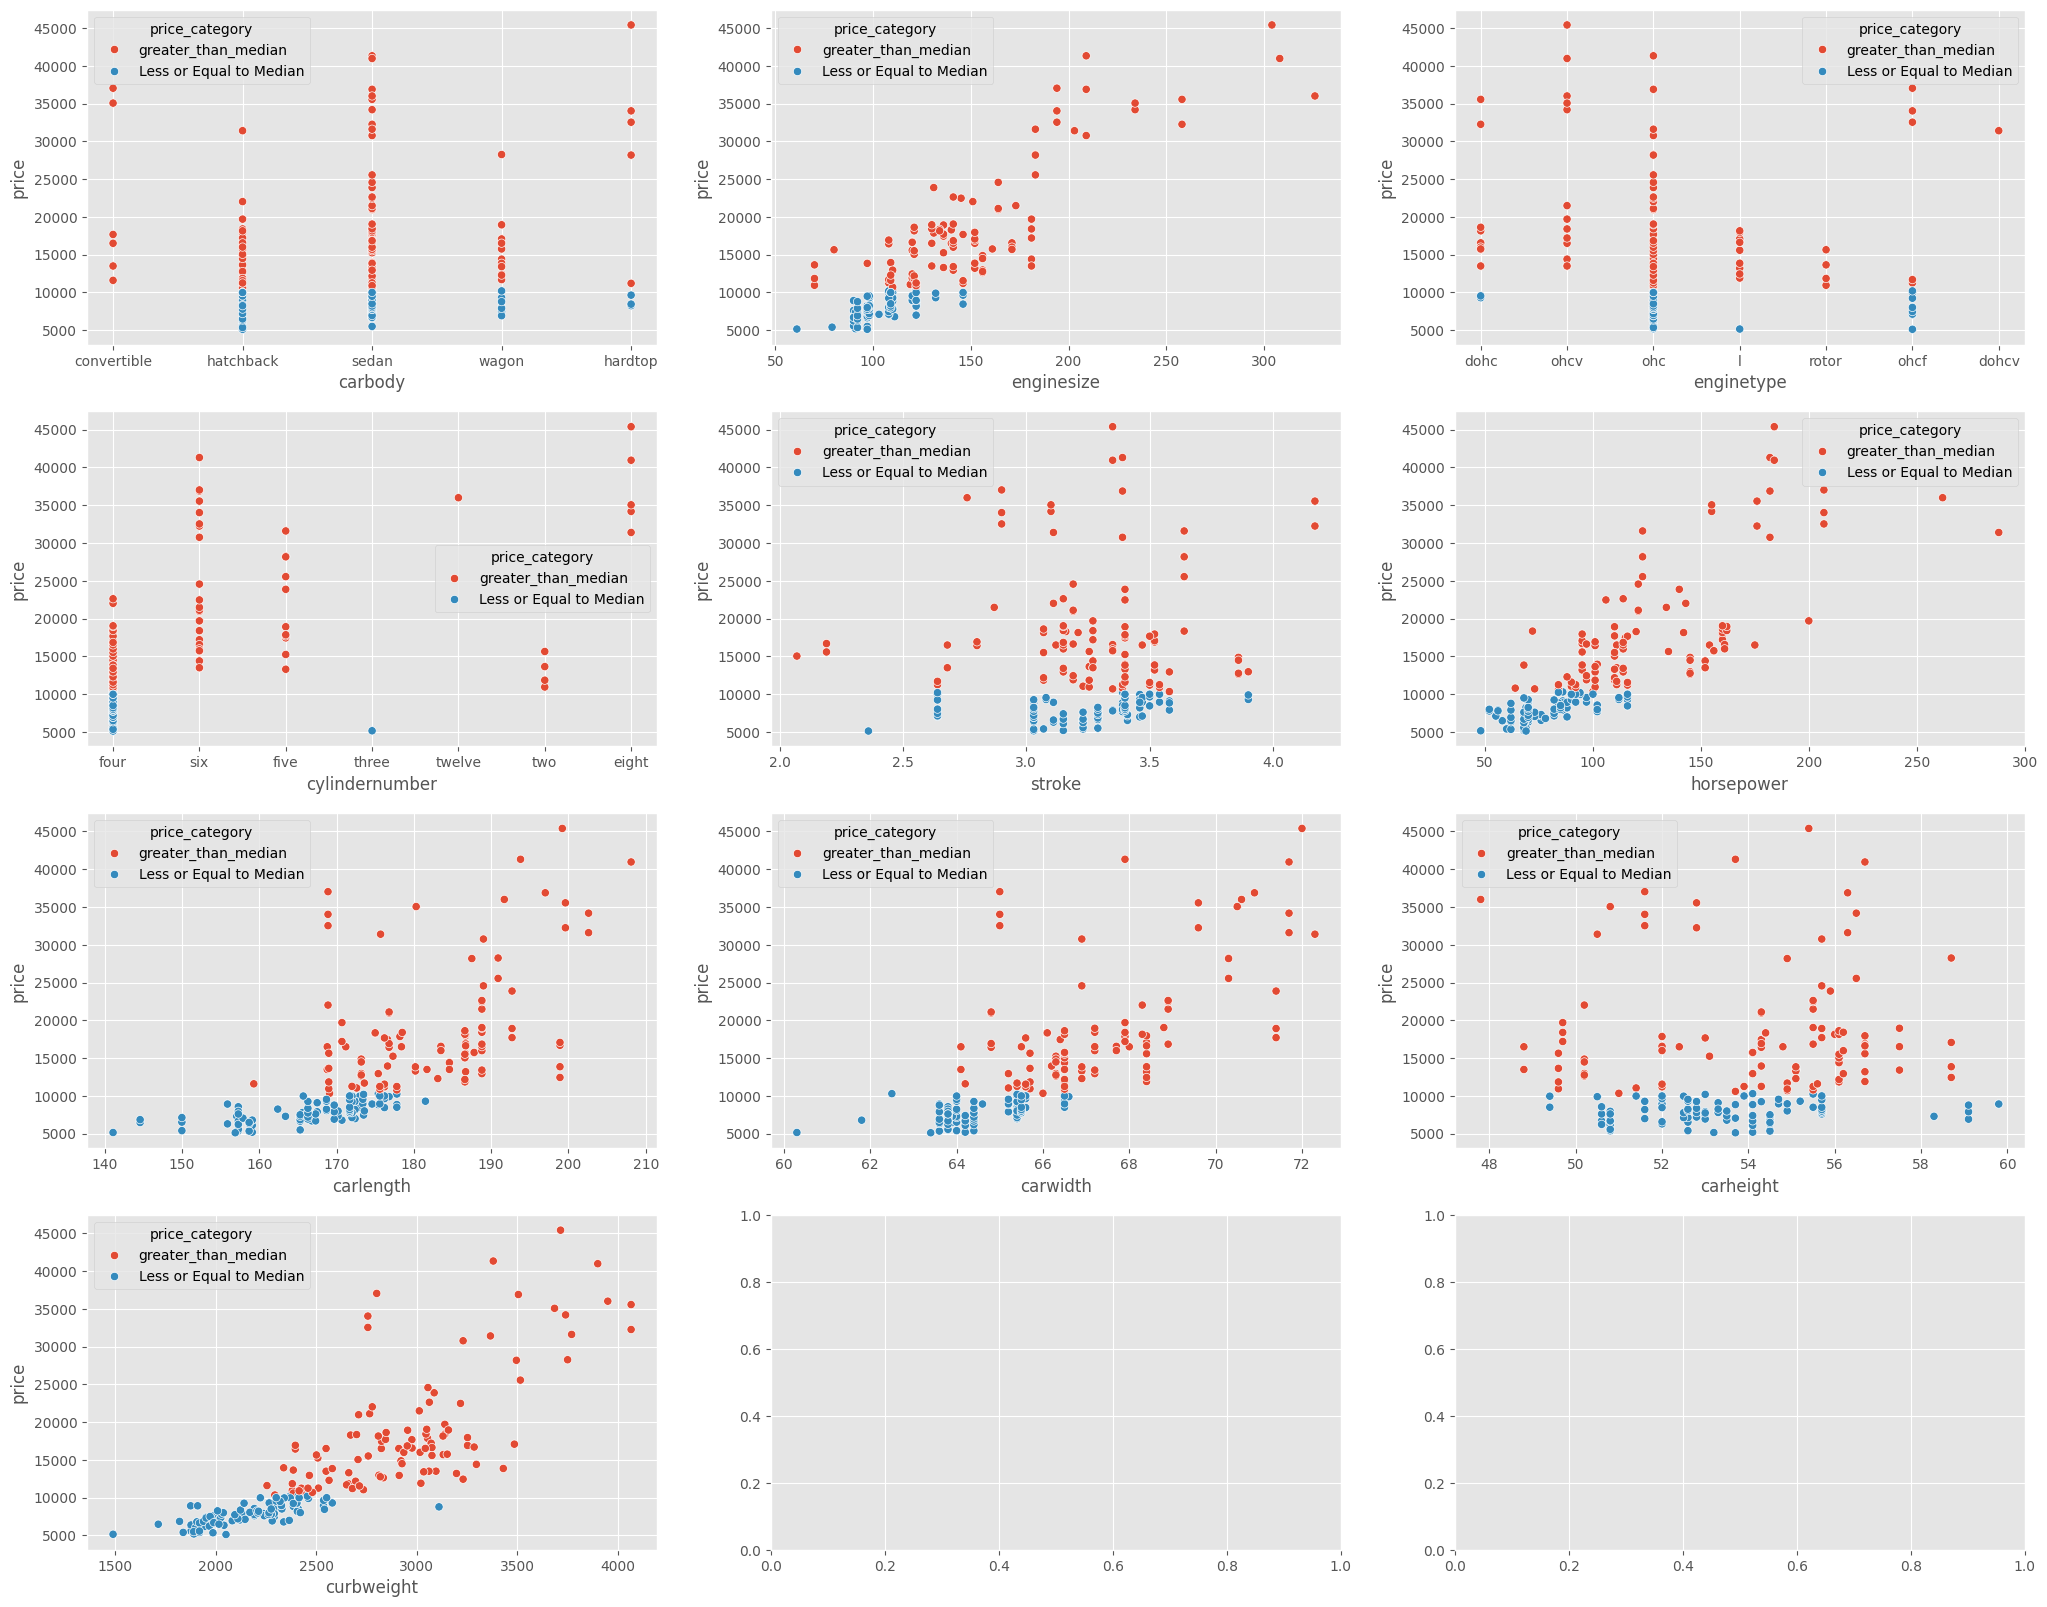

In [28]:
fig, axes = plt.subplots(4, 3, figsize = (25, 20))

sns.scatterplot(ax = axes[0,0], x = 'carbody', y = 'price', data = df, hue = 'price_category')
sns.scatterplot(ax = axes[0,1], x = 'enginesize', y = 'price', data = df, hue = 'price_category')
sns.scatterplot(ax = axes[0,2], x = 'enginetype', y = 'price', data = df, hue = 'price_category')
sns.scatterplot(ax = axes[1,0], x = 'cylindernumber', y = 'price', data = df, hue = 'price_category')
sns.scatterplot(ax = axes[1,1], x = 'stroke', y = 'price', data = df, hue = 'price_category')
sns.scatterplot(ax = axes[1,2], x = 'horsepower', y = 'price', data = df, hue = 'price_category')
sns.scatterplot(ax = axes[2,0], x = 'carlength', y = 'price', data = df, hue = 'price_category')
sns.scatterplot(ax = axes[2,1], x = 'carwidth', y = 'price', data = df, hue = 'price_category')
sns.scatterplot(ax = axes[2,2], x = 'carheight', y = 'price', data = df, hue = 'price_category')
sns.scatterplot(ax = axes[3,0], x = 'curbweight', y = 'price', data = df, hue = 'price_category');

It is observed that enginesize, horsepower, carlength, carwidth and curbwidth; They are characteristics that present relevant information that allows us to classify cars as cheap and expensive according to the criteria


Get features of expensive car brands

In [29]:
# List of brands whose minimum prices are above the median price of the dataframe
brands_to_filter = ['Jaguar', 'Buick', 'Porsche', 'BMW', 'Volvo', 'Audi', 'Mercury', 'Alfa Romeo', 'Peugeot', 'Saab']

# create a subset of the DataFrame filtering by the expensive brands
expensive_brands = df[df['Brand'].isin(brands_to_filter)]

In [30]:
expensive_brands.head()

,Brand,Model,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,price_category
0,Alfa Romeo,Giulia,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,greater_than_median
1,Alfa Romeo,Stelvio,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,greater_than_median
2,Alfa Romeo,Quadrifoglio,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,greater_than_median
3,Audi,100 Ls,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,greater_than_median
4,Audi,100Ls,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,greater_than_median



Get features of cheap car brands

In [31]:
cheap_brands = df[~df['Brand'].isin(brands_to_filter)]

In [32]:
# select non-numeric columns
non_numeric_columns = expensive_brands.select_dtypes(exclude=['number']).columns
# Show unique data for all non-numeric variables
unique_values = expensive_brands[non_numeric_columns].apply(lambda x: x.unique())
print(unique_values)

Brand             [Alfa Romeo, Audi, BMW, Jaguar, Buick, Mercury...
Model             [Giulia, Stelvio, Quadrifoglio, 100 Ls, 100Ls,...
fueltype                                              [gas, diesel]
aspiration                                             [std, turbo]
doornumber                                              [two, four]
carbody             [convertible, hatchback, sedan, wagon, hardtop]
drivewheel                                          [rwd, fwd, 4wd]
enginelocation                                        [front, rear]
enginetype                        [dohc, ohcv, ohc, l, ohcf, dohcv]
cylindernumber                     [four, six, five, twelve, eight]
fuelsystem                                              [mpfi, idi]
price_category                                [greater_than_median]
dtype: object


In [33]:
# Show unique data for all non-numeric variables
unique_values = cheap_brands[non_numeric_columns].apply(lambda x: x.unique())
print(unique_values)

Brand             [Chevrolet, Dodge, Honda, Isuzu, Mazda, Mitsub...
Model             [Impala, Monte Carlo, Vega 2300, Rampage, Chal...
fueltype                                              [gas, diesel]
aspiration                                             [std, turbo]
doornumber                                              [two, four]
carbody             [hatchback, sedan, wagon, hardtop, convertible]
drivewheel                                          [fwd, rwd, 4wd]
enginelocation                                              [front]
enginetype                        [l, ohc, rotor, ohcv, ohcf, dohc]
cylindernumber                        [three, four, two, six, five]
fuelsystem           [2bbl, mpfi, mfi, 1bbl, spfi, 4bbl, idi, spdi]
price_category       [Less or Equal to Median, greater_than_median]
dtype: object


In [34]:
cars_greater = df[df['price_category'] == 'greater_than_median']

print(cars_greater[['Brand', 'Model', 'price']])

          Brand         Model    price
0    Alfa Romeo        Giulia  13495.0
1    Alfa Romeo       Stelvio  16500.0
2    Alfa Romeo  Quadrifoglio  16500.0
3          Audi        100 Ls  13950.0
4          Audi         100Ls  17450.0
..          ...           ...      ...
200       Volvo     145E (Sw)  16845.0
201       Volvo         144Ea  19045.0
202       Volvo         244Dl  21485.0
203       Volvo           246  22470.0
204       Volvo         264Gl  22625.0

[102 rows x 3 columns]


In [35]:
# Select non numeric columns
non_numeric_colums = cars_greater.select_dtypes(exclude=['number']).columns
# show unique data of non numeric columns
unique_values = cars_greater[non_numeric_colums].apply(lambda x: x.unique())
print(unique_values)

Brand             [Alfa Romeo, Audi, BMW, Dodge, Honda, Isuzu, J...
Model             [Giulia, Stelvio, Quadrifoglio, 100 Ls, 100Ls,...
fueltype                                              [gas, diesel]
aspiration                                             [std, turbo]
doornumber                                              [two, four]
carbody             [convertible, hatchback, sedan, wagon, hardtop]
drivewheel                                          [rwd, fwd, 4wd]
enginelocation                                        [front, rear]
enginetype                 [dohc, ohcv, ohc, rotor, l, ohcf, dohcv]
cylindernumber                [four, six, five, twelve, two, eight]
fuelsystem                 [mpfi, mfi, 2bbl, spfi, 4bbl, idi, spdi]
price_category                                [greater_than_median]
dtype: object


In [36]:
cars_lower = df[df['price_category'] == 'Less or Equal to Median']

In [37]:
unique_values = cars_lower[non_numeric_colums].apply(lambda x: x.unique())
print(unique_values)

Brand             [Chevrolet, Dodge, Honda, Isuzu, Mazda, Mitsub...
Model             [Impala, Monte Carlo, Vega 2300, Rampage, Chal...
fueltype                                              [gas, diesel]
aspiration                                             [std, turbo]
doornumber                                              [two, four]
carbody                          [hatchback, sedan, wagon, hardtop]
drivewheel                                          [fwd, rwd, 4wd]
enginelocation                                              [front]
enginetype                                     [l, ohc, ohcf, dohc]
cylindernumber                                        [three, four]
fuelsystem                            [2bbl, mpfi, 1bbl, spdi, idi]
price_category                            [Less or Equal to Median]
dtype: object


In [38]:
# Finding unique values ​​in cars_greater but not in cars_lower
unique_values = {}
for column in non_numeric_colums:
    unique_values[column] = set(cars_greater[column].unique()).difference(cars_lower[column].unique())

# Print
print("Unique values ​​in cars_greater but not in cars_lower:")
for column, valores in unique_values.items():
    print(f"{column}: {valores}")

Unique values ​​in cars_greater but not in cars_lower:
Brand: {'Saab', 'Jaguar', 'Buick', 'Mercury', 'Audi', 'Peugeot', 'BMW', 'Volvo', 'Porsche', 'Alfa Romeo'}
Model: {'Century Luxus (Sw)', '99Le', 'X4', 'Cressida', '99Gle', '99E', '246', 'Diesel', '4000', 'Skylark', 'Duster', '264Gl', '5000', 'Civic (Auto)', 'Stelvio', 'Fuga', 'Otti', 'Boxter', 'Cayenne', '144Ea', 'Teana', '100 Ls', '244Dl', 'Century Special', 'X3', 'Regal Sport Coupe (Turbo)', 'Dayz', 'Electra 225 Custom', '505S Turbo Diesel', 'Z4', '304', 'Celica Gt', 'Cougar', 'Kicks', '145E (Sw)', '504', 'X5', '320I', 'Fox', '5000S (Diesel)', '604Sl', 'X1', 'Glc 4', '100Ls', 'Rx-7 Gs', 'Tercel', 'Macan', 'Skyhawk', 'Quadrifoglio', 'Panamera', '504 (Sw)', 'Century', 'Xj', 'R2', 'Xk', 'Giulia', 'Glc Custom', 'Coronet Custom (Sw)', '245', 'Rabbit Custom', 'Opel Isuzu Deluxe', 'Xf', 'Glc'}
fueltype: set()
aspiration: set()
doornumber: set()
carbody: {'convertible'}
drivewheel: set()
enginelocation: {'rear'}
enginetype: {'ohcv', 'dohc

In [39]:
# Finding unique values ​​in cars_greater and in cars_lower
unique_values = {}
for column in non_numeric_colums:
    unique_values[column] = set(cars_greater[column].unique()) & set(cars_lower[column].unique())

# Print
print("common features:")
for column, valores in unique_values.items():
    print(f"{column}: {valores}")

common features:
Brand: {'Volkswagen', 'Dodge', 'Honda', 'Mitsubishi', 'Isuzu', 'Mazda', 'Subaru', 'Toyota', 'Nissan', 'Plymouth'}
Model: {'Outlander', 'Mirage G4', 'D-Max ', 'Mark Ii', 'Corolla', 'Corolla Liftback', 'Dasher', 'Corona', 'Rabbit', 'Civic', 'Glc Deluxe', 'Clipper', 'Starlet', 'G4', 'Dl', '626'}
fueltype: {'diesel', 'gas'}
aspiration: {'std', 'turbo'}
doornumber: {'four', 'two'}
carbody: {'hardtop', 'sedan', 'hatchback', 'wagon'}
drivewheel: {'fwd', '4wd', 'rwd'}
enginelocation: {'front'}
enginetype: {'ohc', 'dohc', 'l', 'ohcf'}
cylindernumber: {'four'}
fuelsystem: {'spdi', 'mpfi', 'idi', '2bbl'}
price_category: set()


Map the column "price_category" and change to type Boolean

In [40]:
mapping = {'greater_than_median' : True, 'Less or Equal to Median' : False}

df['price_category'] = df['price_category'].map(mapping)

df['price_category'] = df['price_category'].astype(bool)

print(df[['price_category']])

     price_category
0              True
1              True
2              True
3              True
4              True
..              ...
200            True
201            True
202            True
203            True
204            True

[205 rows x 1 columns]


Analize corelations in numeric columns with price

In [41]:
numeric_columns = df[['wheelbase','carlength', 'carwidth', 'carheight', 'curbweight','enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'price']]

<Axes: >

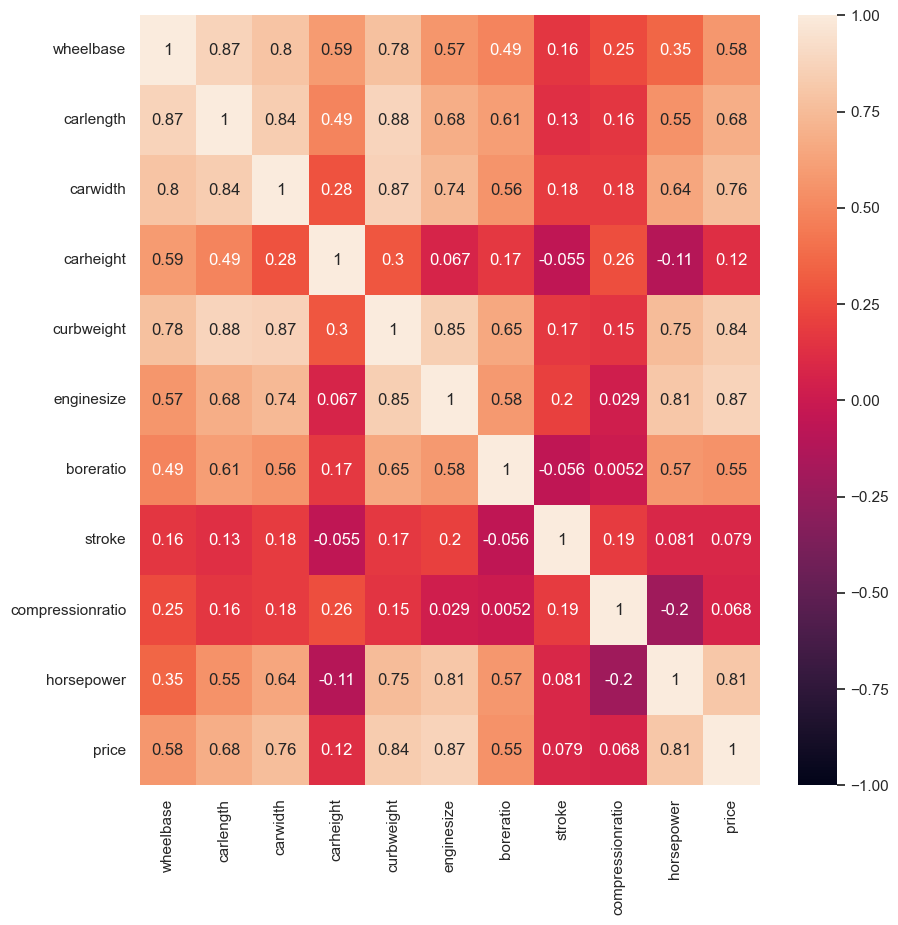

In [42]:
numeric_columns_cor = numeric_columns.corr()

sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(numeric_columns_cor, annot=True, vmax=1, vmin=-1)

Categorize non numeric colums

In [43]:
non_numeric_columns

Index(['Brand', 'Model', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'price_category'],
      dtype='object')

In [44]:
convert = ['Brand', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

df_dummies = pd.get_dummies(df[convert], drop_first=False)

df=pd.concat([df, df_dummies], axis=1)

columns_to_drop = ['Brand', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'stroke', 'compressionratio', 'Model', 'peakrpm']
df = df.drop(columns=columns_to_drop)
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,price_category,Brand_Alfa Romeo,Brand_Audi,Brand_BMW,Brand_Buick,Brand_Chevrolet,Brand_Dodge,Brand_Honda,Brand_Isuzu,Brand_Jaguar,Brand_Mazda,Brand_Mercury,Brand_Mitsubishi,Brand_Nissan,Brand_Peugeot,Brand_Plymouth,Brand_Porsche,Brand_Renault,Brand_Saab,Brand_Subaru,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,111,21,27,13495.0,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,111,21,27,16500.0,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,154,19,26,16500.0,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,102,24,30,13950.0,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,115,18,22,17450.0,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False


In [45]:
df.to_csv('../Data/data_modeling.csv', index=False)